In [143]:
import os
import matplotlib.pyplot as plt
import glob
from scipy.io import wavfile
import IPython.display as ipd
import librosa
from tqdm import tqdm
import pandas as pd
import shutil

In [42]:
def FileName2ClassNum(table, fileName):
    
    boolMask = (table['slice_file_name'] == fileName)
    
    idx = int(table['classID'][boolMask])
    
    return idx

In [144]:
metaTable = pd.read_csv('../data/UrbanSound8K/metadata/UrbanSound8K.csv')

In [145]:
folders = os.listdir('../data/UrbanSound8K/audio/audio')
folders.sort()

foldFolders = [folder for folder in folders if 'fold' in folder]
classFolders = [folder for folder in folders if 'class' in folder]

print(foldFolders)
print(classFolders)

['fold01', 'fold02', 'fold03', 'fold04', 'fold05', 'fold06', 'fold07', 'fold08', 'fold09', 'fold10']
['class00', 'class01', 'class02', 'class03', 'class04', 'class05', 'class06', 'class07', 'class08', 'class09']


In [134]:
# Move files from fold to class
samplingRates = list()
dataLength = list()
classLabel = list()

for j in range(len(foldFolders)):

    wavFileList = glob.glob('../data/UrbanSound8K/audio/audio' + '/' + foldFolders[j] + '/' + '*.wav')
    wavFileList.sort()

    for i in tqdm(range(len(wavFileList))):

    #   fs, data= wavfile.read(wavFileList[i])
    #   data, fs = librosa.load(wavFileList[i])

        waveName = wavFileList[i].split('/')[-1]

        label = FileName2ClassNum(metaTable, waveName)

    #   samplingRates.append(fs)
    #   dataLength.append(len(data))
    #   classLabel.append(label)

        newFolder = 'class{:02d}'.format(label)

        shutil.copy(wavFileList[i], '../data/UrbanSound8K/audio/audio/' + newFolder + '/' + waveName)



 91%|█████████ | 744/816 [00:04<00:00, 163.60it/s]


100%|██████████| 837/837 [00:12<00:00, 37.72it/s]


In [ ]:
# Move files from fold to class
nsc = 224 * 2
nov = int(nsc/2)

for j in range(len(classFolders)):

    wavFileList = glob.glob('../data/UrbanSound8K/audio/audio' + '/' + classFolders[j] + '/' + '*.wav')
    wavFileList.sort()

    imgs = list()
    
    for i in range(len(wavFileList)):

        data, fs = librosa.load(wavFileList[i])
        Pxx_, freqs, bins, im = plt.specgram(data, NFFT=nsc, noverlap=nov, Fs=fs, window=np.hamming(nsc))
        plt.close()
        Pxx = 10 * np.log10(Pxx_)
        
        xLen = Pxx.shape[1]
        waveName = wavFileList[i].split('/')[-1]
        
        if xLen > 224:
            start = int(np.floor(xLen/2)) - 112
            end = start + 224
            img = Pxx[1:, start:end]
            imgs.append(img)
            
        else:
            print('File: {}\t Specgram length: {}'.format(waveName, xLen))
        
    npyFileName = '../data/UrbanSound8K/audio/audio' + '/' + classFolders[j] + '/' + classFolders[j] + '.npy'
    
    np.save(npyFileName, imgs)
    
    print('Folder {} Processed'.format(classFolders[j]))


File: 127873-0-0-0.wav	 Specgram length: 199


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:7598: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:7598: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


Folder class00 Processed
File: 100648-1-0-0.wav	 Specgram length: 62
File: 100648-1-1-0.wav	 Specgram length: 102
File: 100648-1-2-0.wav	 Specgram length: 38
File: 100648-1-3-0.wav	 Specgram length: 158
File: 100648-1-4-0.wav	 Specgram length: 182
File: 107090-1-0-0.wav	 Specgram length: 57
File: 107090-1-1-0.wav	 Specgram length: 80
File: 117536-1-0-0.wav	 Specgram length: 55
File: 118070-1-0-0.wav	 Specgram length: 21
File: 118496-1-0-0.wav	 Specgram length: 24
File: 118496-1-1-0.wav	 Specgram length: 17
File: 121299-1-0-0.wav	 Specgram length: 61
File: 125520-1-0-0.wav	 Specgram length: 83
File: 125520-1-1-0.wav	 Specgram length: 213
File: 125520-1-2-0.wav	 Specgram length: 84
File: 125520-1-3-0.wav	 Specgram length: 84
File: 125520-1-4-0.wav	 Specgram length: 54
File: 132073-1-0-0.wav	 Specgram length: 142
File: 132073-1-1-0.wav	 Specgram length: 112
File: 132073-1-2-0.wav	 Specgram length: 35
File: 132073-1-3-0.wav	 Specgram length: 194
File: 132073-1-4-0.wav	 Specgram length: 75


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:7598: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


File: 71439-1-3-0.wav	 Specgram length: 53
File: 72567-1-3-0.wav	 Specgram length: 111
File: 73168-1-0-0.wav	 Specgram length: 63
File: 73168-1-1-0.wav	 Specgram length: 101
File: 73168-1-2-0.wav	 Specgram length: 82


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:7598: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10


File: 77509-1-0-0.wav	 Specgram length: 57
File: 83465-1-0-0.wav	 Specgram length: 50
File: 83488-1-0-0.wav	 Specgram length: 56
File: 83488-1-1-0.wav	 Specgram length: 27
File: 87275-1-0-0.wav	 Specgram length: 13
File: 87275-1-1-0.wav	 Specgram length: 3
File: 87275-1-2-0.wav	 Specgram length: 3
File: 87275-1-3-0.wav	 Specgram length: 4
File: 87275-1-4-0.wav	 Specgram length: 5
File: 87275-1-5-0.wav	 Specgram length: 9
File: 89679-1-0-0.wav	 Specgram length: 126
File: 89679-1-1-0.wav	 Specgram length: 72
File: 94401-1-0-0.wav	 Specgram length: 107
File: 94868-1-0-0.wav	 Specgram length: 33
File: 94868-1-1-0.wav	 Specgram length: 37
File: 94868-1-2-0.wav	 Specgram length: 35
File: 99812-1-3-0.wav	 Specgram length: 209
Folder class01 Processed


In [152]:
ipd.Audio(data, rate=fs)

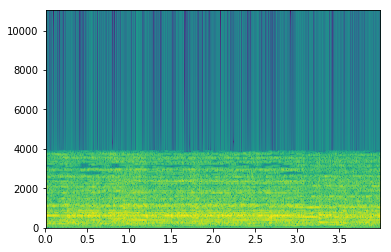

In [100]:
import numpy as np

nsc = int(448)
nov = int(nsc/2)

Pxx, freqs, bins, im = plt.specgram(data, NFFT=nsc, noverlap=nov, Fs=fs, window=np.hamming(nsc))
plt.show()
ipd.Audio(data, rate=fs)

In [101]:
np.shape(Pxx)

(225, 392)

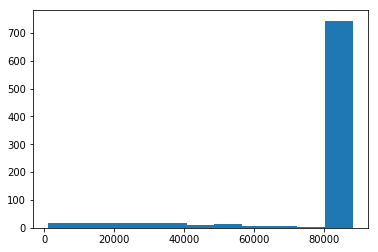

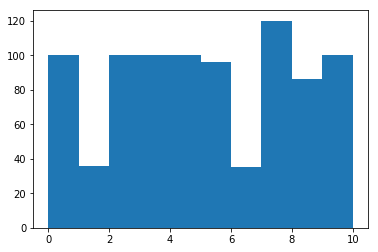

In [65]:
plt.hist(dataLength, bins='auto')
plt.show()

plt.hist(classLabel, bins=range(11))
plt.show()

In [102]:
data, fs = librosa.load(wavFileList[10])